### This is a simple exploratory analysis of New York State renewable energy projects data found here: https://www.nyserda.ny.gov/All-Programs/Programs/NY-Sun/Data-and-Trends

#### I have chosen this data because it is well formatted. I ran across possibly better data out there, but scraping, compiling, and assuring quality of data usually takes twice as long and requires twice the effort as the actual data analysis. There are still quite a few NaNs in the dataset, but it is manageable.

#### I am also blindly assuming the data is accurate, which is a major assumption that should also usually be scrutinized before any data analysis. The purpose of this notebook is just to display my capabilities.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib# plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pprint import pprint
import seaborn as sns

In [2]:
%%bash 
#python --version
# conda install pandas
# conda install matplotlib
# conda install tensorflow keras scikit-learn
#conda install seaborn
#conda install -c conda-forge jupyter_contrib_nbextensions
#jupyter contrib nbextension install --user
#git remote add origin https://gitlab.com/rednirgskizzif/nys_solar

In [3]:
df = pd.read_csv('data/solar-electric-programs-reported-by-nyserda-beginning-2000.csv', delimiter=',')
#df.dataframeName = 'solar_cost.csv'
nRow, nCol = df.shape
#print(f"There are {nRow} rows and {nCol} columns")
print("There are %s rows and %s columns" % (nRow,nCol))
print("The dataframe is %s MB" % round( sum(  df.memory_usage().values/1000000 ) ))

There are 87329 rows and 30 columns
The dataframe is 21.0 MB


In [5]:
#What datums do we have to work with?
pprint( list(df.columns.values) )

['Reporting Period',
 'Project Number',
 'City',
 'County',
 'State',
 'Zip Code',
 'Sector',
 'Program Type',
 'Solicitation',
 'Electric Utility',
 'Purchase Type',
 'Date Application Received',
 'Date Completed',
 'Project Status',
 'Contractor',
 'Primary Inverter Manufacturer',
 'Primary Inverter Model Number',
 'Total Inverter Quantity',
 'Primary PV Module Manufacturer',
 'PV Module Model Number',
 'Total PV Module Quantity',
 'Project Cost',
 '$Incentive',
 'Total Nameplate kW DC',
 'Expected KWh Annual Production',
 'Remote Net Metering',
 'Affordable Solar',
 'Community Distributed Generation',
 'Green Jobs Green New York Participant',
 'Location 1']


In [6]:
#Looks like they are all from the same state.
df.State.unique()

array(['NY'], dtype=object)

In [7]:
print( "Looks like there is 3 different program types")
print( df["Program Type"].unique() )
print("------------------")
for program_type in df["Program Type"].unique() : #Loop over unique types. 
    total = len(df[ (df["Program Type"] == str(program_type)) ])
    print( "There are %s programs of type "%total + program_type )
    
# The above code can be written in one line but I prefer to split it for readability. 
# This is very important in computational coding where one is constantly reading complex 
# mathematical code. I also prefer longer variable names also for this reason.

Looks like there is 3 different program types
['Residential/Small Commercial' 'Commercial/Industrial (MW Block)'
 'Commercial/Industrial (Competitive)']
------------------
There are 86643 programs of type Residential/Small Commercial
There are 432 programs of type Commercial/Industrial (MW Block)
There are 254 programs of type Commercial/Industrial (Competitive)


### Since this is just a 1 CPU AWS node with 1 GB of RAM it will speed up calculations to slim & skim the dataset. With the dataframe at 1/5 the size of useable ram we should be fine, but it still pays to clean things up. 

For dataframes larger than about half the RAM size it is better to chunk the dataset. If the number of chunks grows too large the next level of optimization is usually a distributed computing model such as Spark or Hadoop. I have NOT used these technologies but I have somewhat advanced experience with a similar framework that is common for research use: htCondor.

In [8]:
#slimming: remove unwanted columns
del df["City"]
del df["County"]
del df["State"]
del df["Zip Code"]
del df["Location 1"]
#skimming: cutting out data we don't want to use
#Here since almost all the data is Residential I will just focus on those for now
# df = df[ df["Program Type"] == "Residential/Small Commercial"]
# del df["Program Type"]

In [9]:
print('The dataframe is now %s MB'%round( sum(  df.memory_usage().values/1000000 ) ))
#No considerable improvement.

The dataframe is now 17.0 MB


# Now to begin some data exploration

In [10]:
#Hide Code
#I have no idea at this point what will be useful.
%matplotlib inline
countable_variables = ["Solicitation","Program Type","Sector","Electric Utility","Affordable Solar","Purchase Type","Primary Inverter Manufacturer","Primary Inverter Model Number","Contractor"]
log_scale = ["Solicitation","Affordable Solar"]#,"Program Type"]
plt.rc('axes', labelsize=104)
# f, axes = plt.subplots(3,3)
# fig = plt.figure()
# plt.rc(axes.labelsize : 20)
fig, ax =plt.subplots(9,1)
fig.set_size_inches((77,207))

# countable_variables = ["Primary Inverter Manufacturer","Contractor","Purchase Type"]


for n,variable in enumerate(countable_variables):
#     print(n)
#     print(ax[0,0]) 
    #Look only at the top 7 categories
    p = sns.countplot( y=variable,data=df, ax=ax[n],order=pd.value_counts(df[variable]).iloc[:7].index )
    if variable in log_scale:
        p.set(xscale="log")
    p.tick_params(labelsize=54)
#     p.set_xticklabels(fontsize=30)
    p.set_aspect(1300)
plt.savefig("explore_counts.png")
plt.show()


/Users/frizzell/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:1410: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))
/Users/frizzell/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:1410: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))
/Users/frizzell/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:1410: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))
/Users/frizzell/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:1410: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))
/Users/frizzell/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:1410: UserWarning: aspect is not supported for Axes with xscale=log, yscale=linear
  'yscale=%s' % (xscale, yscale))
/Users/frizzell

## Countplots notes
From here I can say the PON Solicitation is by far the most common occurance in this datset. These are mostly residential contracts, and the least common Purchase Type in this datset is the PPA. I will possibly be able to identify differences in valuation based on Purchase Type.

The primary model manufacturer has too many categories to be useful at this moment. A complete analysis could be done comparing similar projects with different inverters. I will probably do this in another notebook. There are also too many contractors to make any conclusion other than SolarCity seems to be a key player.

*note to self: Perhaps it is possible to only look at the 10,000 PPA contracts to get a better idea of the PPAs in this dataset in particular. I will table this idea for now.*

# Continuous/Pseudo-continuous Variable Anaysis

In [11]:
#plotCorrelationMatrix(df,10)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)



### The correlation matrix always gives the most information about the dataset. 
\begin{equation}
\rho_{i,j} = \frac{\sum_{i,j} (x_i-\bar{x_i})(x_j-\bar{x_j})}{\sigma_i \sigma_j}
\end{equation}
I can see from this that there is a degeneracy in information in that the Expected kWh is probably just a constant multiplicative of the Total Nameplate kW. This means that they haven't done any detailed analysis of weather effects within the state of NY, they simply assume every solar project will produce X hours a year. Depending on geographical effects (mountains, sea) on cloud coverage this could potentially be a huge oversight. **This factor is 1174, for the record **

There is only four worthwhile "continuous" variables, all other in the dataset are classifier-type (Module brand, etc.)

This also suggests that the Project cost is most heavily dependent on the total number of PV modules, secondly on the \$Incentive (I assume this is government subsidy or tax incentive), and lastly on the number of Inverters which is very uncorrelated which is suspicious. 

*note to self for later: make this plot independently for each type of inverter and module. Can also and estimate uncertainty on estimator of true $\rho$ if necessary, probably use Monte Carlo*

# To visualize the correlations in more detail, I will look more closely at the relevant variables.

In [12]:
# (df["Expected KWh Annual Production"] / df["Total Nameplate kW DC"]).tail(50)
# (df.loc[df["Purchase Type"] == "Power Purchase Agreement"]["Project Cost"] / df.loc[df["Purchase Type"] == "Power Purchase Agreement"]["Total Nameplate kW DC"]).std()
# (df["Project Cost"] / df["Expected KWh Annual Production"]).std()
# (df["Project Cost"] / df["Total Nameplate kW DC"]).std()

In [17]:
numerical_variables = ["Total Nameplate kW DC","Project Cost","Total Inverter Quantity","Total PV Module Quantity","$Incentive","Expected KWh Annual Production"]
categorical_variables = ["Purchase Type","Sector","Electric Utility","Affordable Solar"]
thin_df = df[numerical_variables+categorical_variables]
#thin_df = thin_df[ ~(thin_df.isna().any(axis=1)) ] # Same as below
thin_df = thin_df.dropna(axis=0)

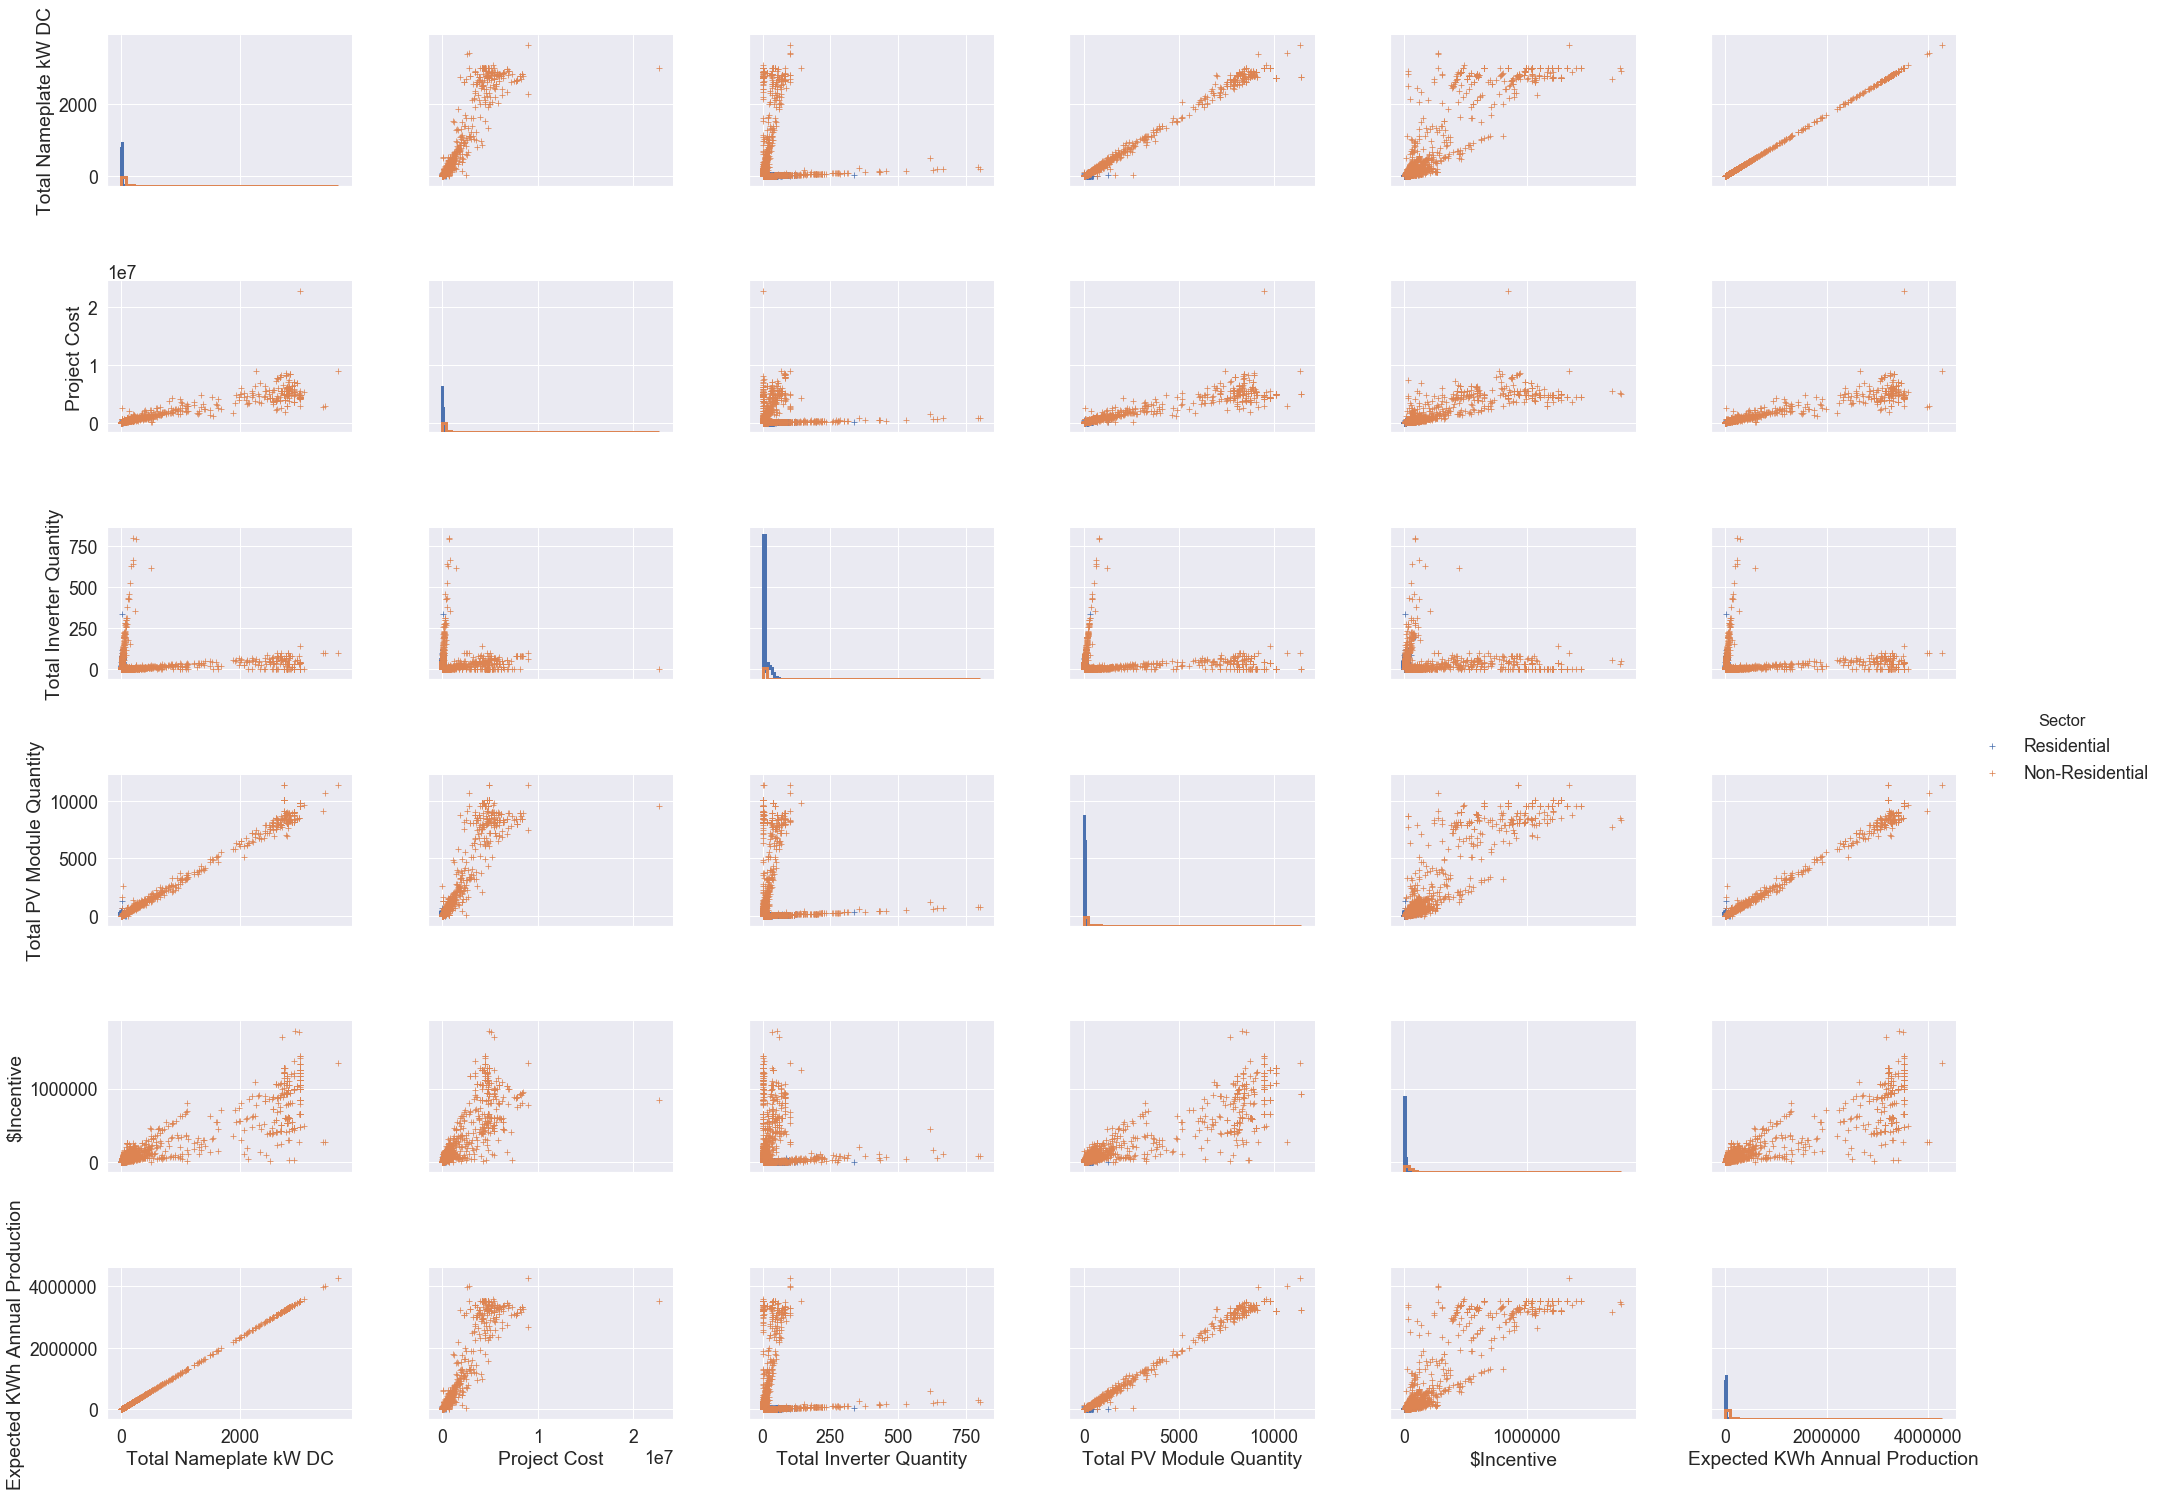

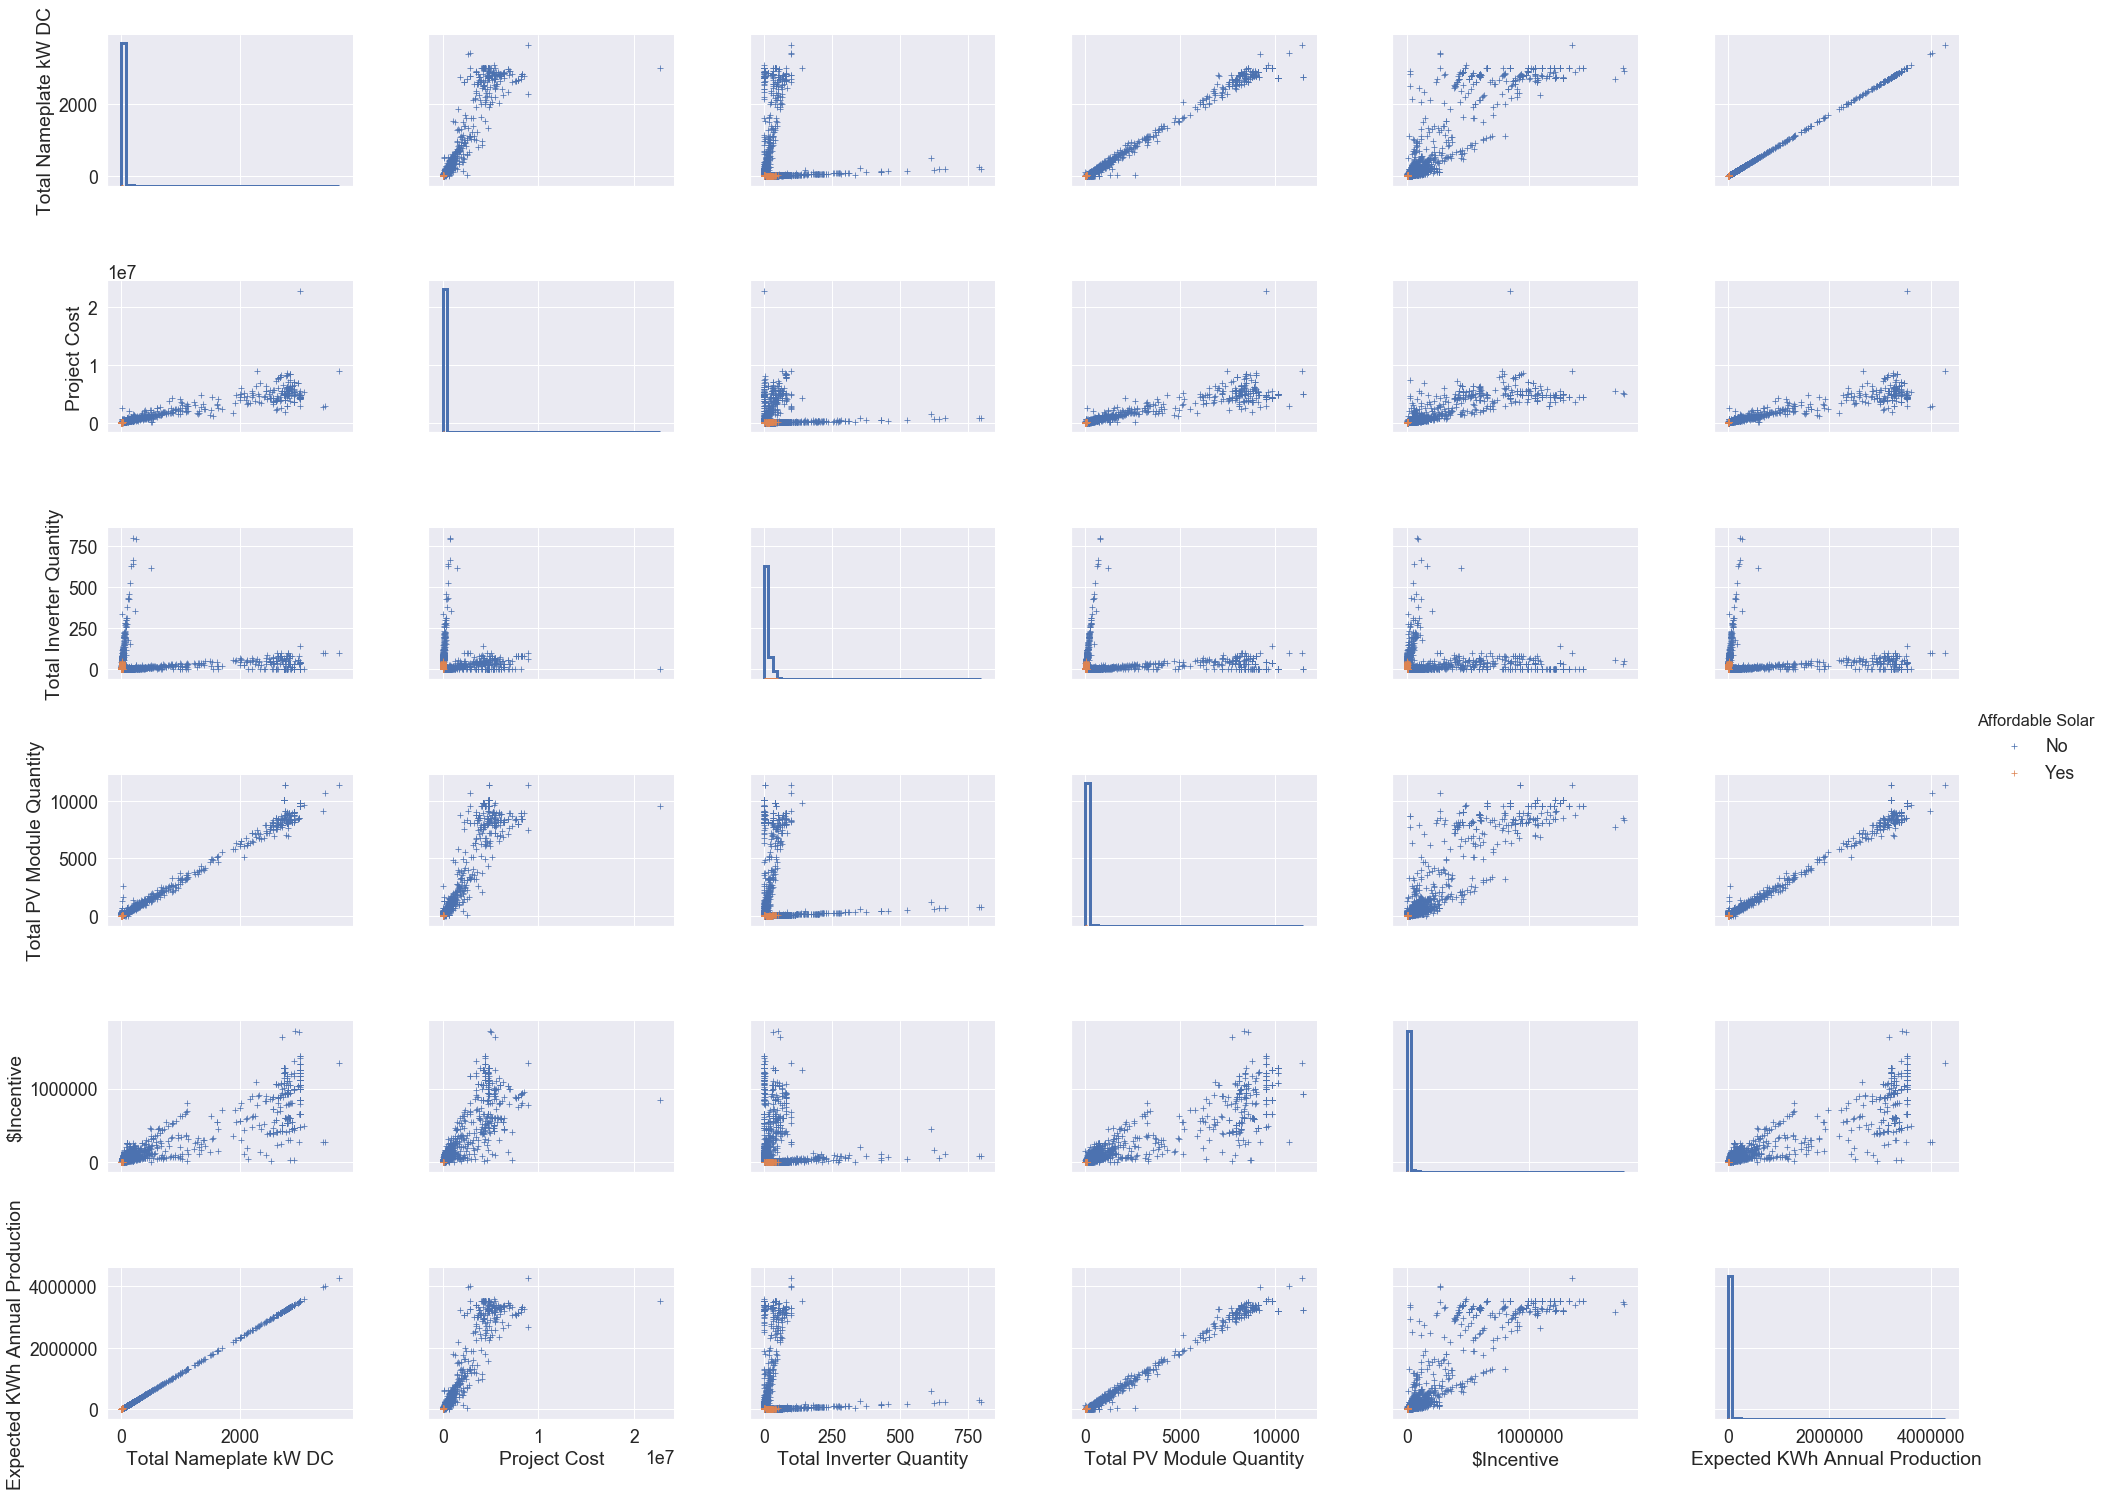

In [18]:
for cat in categorical_variables:
    
    sns.set(font_scale=1.6) 
    g = sns.pairplot(thin_df,
                     hue=cat,
                     diag_kind="hist",
                     vars=numerical_variables,
                     markers="+",
                     height=3.5,
                     aspect=1.3,
                     diag_kws={"histtype":"step","linewidth":3,"bins":50} )

    #g.axes[0][0].set_xlim((0,250))
    #g.axes[1,1].set_xlim((0,3500))
#     g.axes[0,0].set_xscale('log')
#     g.axes[1,1].set_xscale('log')
#     g.axes[2,2].set_xscale('log')
#     g.axes[3,3].set_xscale('log')
    plt.show()
    plt.savefig("scatter_"+cat+".png")
    del g



# Take note of the log scale on the X-axis!!!
From here there is almost too much information to deal with, but at least the inverter suspicion I had has some light shed on it. I will record a few first impressions, pose a couple questions and try and answer 1 or 2 in another notebook(s).

Below I add just a couple more interesting plots blown-up.

In [19]:
sns.jointplot("Total Nameplate kW DC",
                      "Expected KWh Annual Production",data=thin_df,    
                      color="b",#xlim=(-10,300),ylim=(-30000,1000000),
                      height=7, linewidth=0.5,marker="+")

/Users/frizzell/miniconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


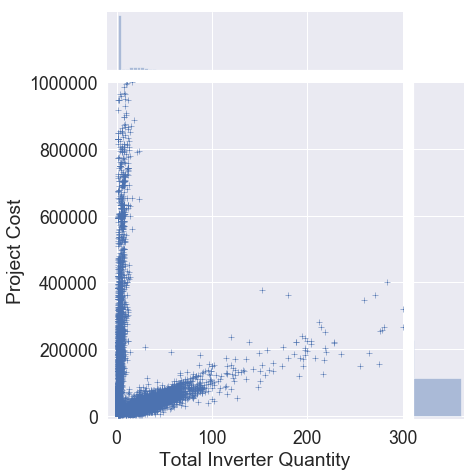

In [20]:
sns.jointplot("Total Inverter Quantity",
                      "Project Cost",data=thin_df,    
                      color="b",
                      xlim=(-10,300),
                      ylim=(-10000,1000000),
                      marginal_kws={"bins":200},
                      height=7, linewidth=0.5,marker="+")

## First Impressions
1. The absolute most interesting thing I notice is that there is very clearly two populations present in the inverter quantity. This is not only reflected in the project cost and annual KWh, but also in the PV Module quantitiy. My first guess, supported by the inverter quantity vs. PV quantity scatter, is that there is two configurations for large solar projects: One that uses many smaller inverters, and one that uses many panels but relatively few inverters. At this level of available data I don't know the power of the PVs or rating of the inverters used (But I do have model and manufacturer for some, so this could be infered maybe), so this may also be a hidden variable issue as well relating  the type of PV and inverter used. 
2. Residential solar projects can be smaller than commercial. Seems obvious.
3. I think there may be something to investigate with PSEG Long Island. There is an anamoly around Project cost of  $ \$ 10^4$ and a slightly higher than usual number of PV modules that doesn't fit the trend. It also shows up in the lower part of the \$Incentive versus PV Qty. scatter. Maybe there was a special program running or something. Maybe it would be interesting to cut on these data points and see of there is any other anomaly in one of the categorical variables, such as a contractor that was under-bidding projects.

## Possible questions to answer

1. Why is the project cost relative to the inverter quantity bi-modal? 
Be sure and look into inverter model and contractor.
2. Investigate the anamoly present in the cost vs. PV qty scatter.
3. Create different data categories based on the largest contractors and largest inverter manufacturers. Investigate differences between the two.
4. Create predictive model of cost based on incentive and PV/inverter qty. Hopefully incorporate a reconstructed variable to explain bi-modal nature of inveter quantity.

In [ ]:
# df[df["Primary Inverter Manufacturer"].map(lambda x : "Enphase" not in str(x)) ]["Primary Inverter Model Number"].dropna(axis=0).unique()
# df[df["MicroInverter"]]["Primary Inverter Model Number"]